---
title: Motonic Networks Showcase
subtitle: Fitting shapes using NIGnets powered by Monotonic Networks
date: 2025-02-26
---

We now fit Injective Networks powered by Monotonic Networks to some target shapes to get a sense of
their representation power and shortcomings.

In [1]:
# Basic imports
import torch
from torch import nn
import geosimilarity as gs
from NIGnets import NIGnet
from NIGnets.monotonic_nets import SmoothMinMaxNet

from assets.utils import automate_training, plot_curves

# Intersection Possible
We now fit Injective Networks to target curves when there are no additional constraints on the
network weight matrices and therefore, non-invertibility of weight matrices is possible during
optimization.

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    0.547613
Epoch: [ 200/1000]. Loss:    0.000026
Epoch: [ 400/1000]. Loss:    0.000018
Epoch: [ 600/1000]. Loss:    0.000001
Epoch: [ 800/1000]. Loss:    0.000001
Epoch: [1000/1000]. Loss:    0.000003
Training Square Net:
Epoch: [   1/1000]. Loss:    0.818737
Epoch: [ 200/1000]. Loss:    0.004455
Epoch: [ 400/1000]. Loss:    0.000678
Epoch: [ 600/1000]. Loss:    0.000054
Epoch: [ 800/1000]. Loss:    0.000031
Epoch: [1000/1000]. Loss:    0.000030


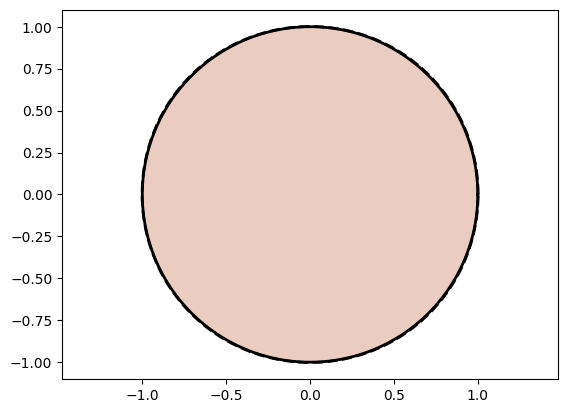

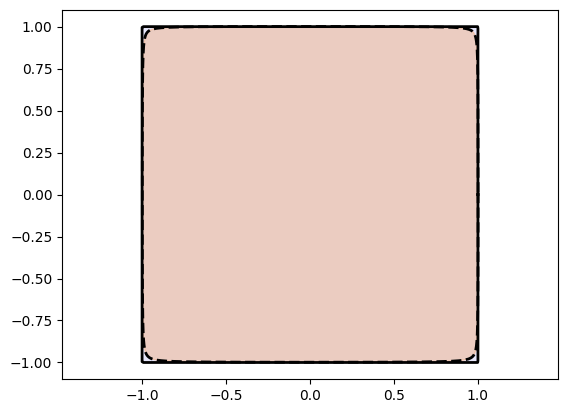

In [ ]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 3, nodes_per_group = 3)
circle_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net, skip_connections = False)
square_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net, skip_connections = False)

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    0.405484
Epoch: [ 2000/10000]. Loss:    0.002212
Epoch: [ 4000/10000]. Loss:    0.000762
Epoch: [ 6000/10000]. Loss:    0.000694
Epoch: [ 8000/10000]. Loss:    0.000623
Epoch: [10000/10000]. Loss:    0.000573


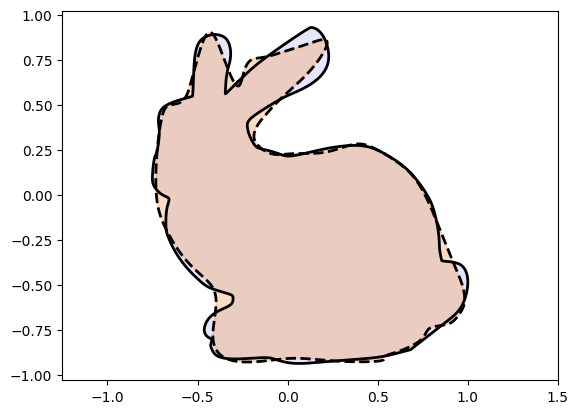

In [ ]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = stanford_bunny(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, skip_connections = False)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Heart

Epoch: [    1/10000]. Loss:    0.396301
Epoch: [ 2000/10000]. Loss:    0.000095
Epoch: [ 4000/10000]. Loss:    0.000052
Epoch: [ 6000/10000]. Loss:    0.000042
Epoch: [ 8000/10000]. Loss:    0.000033
Epoch: [10000/10000]. Loss:    0.000023


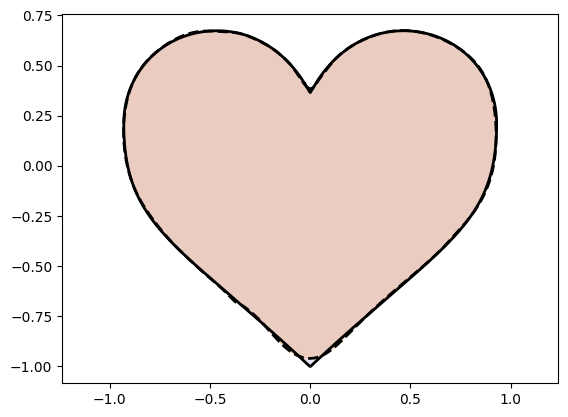

In [ ]:
from assets.shapes import heart

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = heart(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, skip_connections = False)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Hand

Epoch: [    1/10000]. Loss:    0.298368
Epoch: [ 2000/10000]. Loss:    0.004449
Epoch: [ 4000/10000]. Loss:    0.001544
Epoch: [ 6000/10000]. Loss:    0.000503
Epoch: [ 8000/10000]. Loss:    0.000424
Epoch: [10000/10000]. Loss:    0.000375


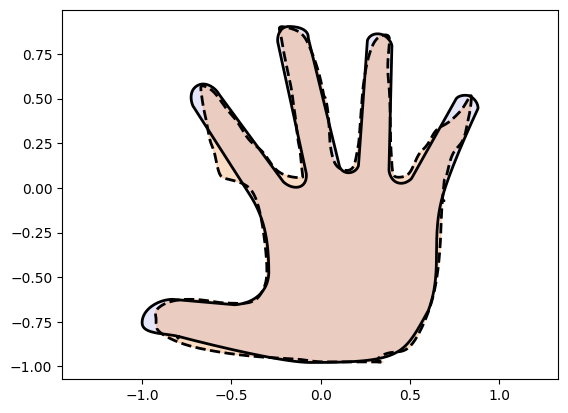

In [ ]:
from assets.shapes import hand

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = hand(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, skip_connections = False)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Puzzle Piece

Epoch: [    1/10000]. Loss:    0.390480
Epoch: [ 2000/10000]. Loss:    0.003039
Epoch: [ 4000/10000]. Loss:    0.001704
Epoch: [ 6000/10000]. Loss:    0.001034
Epoch: [ 8000/10000]. Loss:    0.000655
Epoch: [10000/10000]. Loss:    0.000405


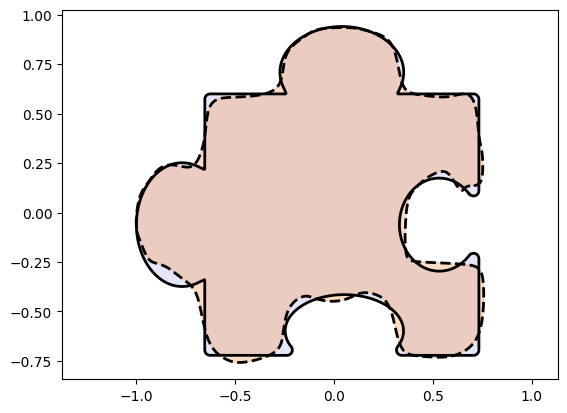

In [ ]:
from assets.shapes import puzzle_piece

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = puzzle_piece(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, skip_connections = False)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Airplane

Epoch: [    1/10000]. Loss:    0.348040
Epoch: [ 2000/10000]. Loss:    0.002185
Epoch: [ 4000/10000]. Loss:    0.001573
Epoch: [ 6000/10000]. Loss:    0.001064
Epoch: [ 8000/10000]. Loss:    0.000964
Epoch: [10000/10000]. Loss:    0.000903


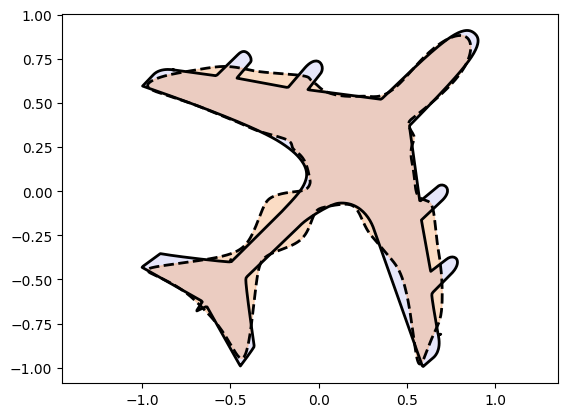

In [ ]:
from assets.shapes import airplane

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = airplane(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, skip_connections = False)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

# Intersection Possible - Skip Connections

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    0.699906
Epoch: [ 200/1000]. Loss:    0.000020
Epoch: [ 400/1000]. Loss:    0.000378
Epoch: [ 600/1000]. Loss:    0.000386
Epoch: [ 800/1000]. Loss:    0.000003
Epoch: [1000/1000]. Loss:    0.000003
Training Square Net:
Epoch: [   1/1000]. Loss:    1.171333
Epoch: [ 200/1000]. Loss:    0.006201
Epoch: [ 400/1000]. Loss:    0.003445
Epoch: [ 600/1000]. Loss:    0.001729
Epoch: [ 800/1000]. Loss:    0.000271
Epoch: [1000/1000]. Loss:    0.000084


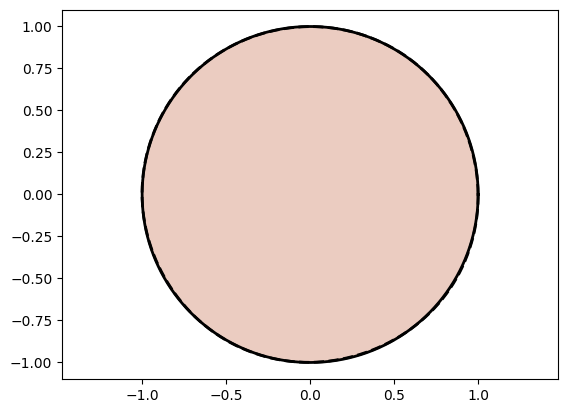

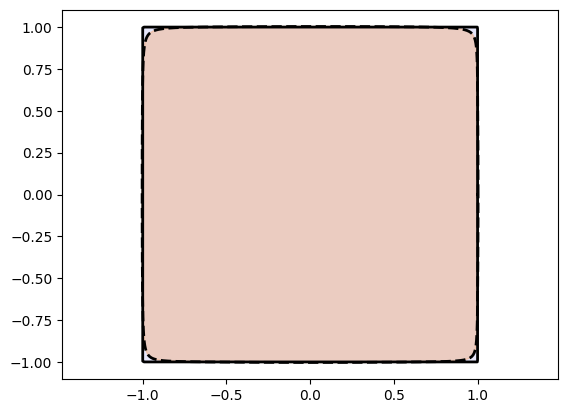

In [6]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 3, nodes_per_group = 3)
circle_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net)
square_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net)

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    0.375276
Epoch: [ 2000/10000]. Loss:    0.000784
Epoch: [ 4000/10000]. Loss:    0.000446
Epoch: [ 6000/10000]. Loss:    0.000374
Epoch: [ 8000/10000]. Loss:    0.000335
Epoch: [10000/10000]. Loss:    0.000306


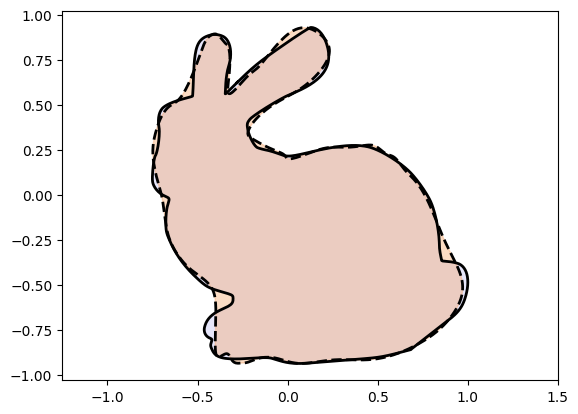

In [7]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = stanford_bunny(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Heart

Epoch: [    1/10000]. Loss:    0.572621
Epoch: [ 2000/10000]. Loss:    0.000518
Epoch: [ 4000/10000]. Loss:    0.000028
Epoch: [ 6000/10000]. Loss:    0.000021
Epoch: [ 8000/10000]. Loss:    0.000016
Epoch: [10000/10000]. Loss:    0.000012


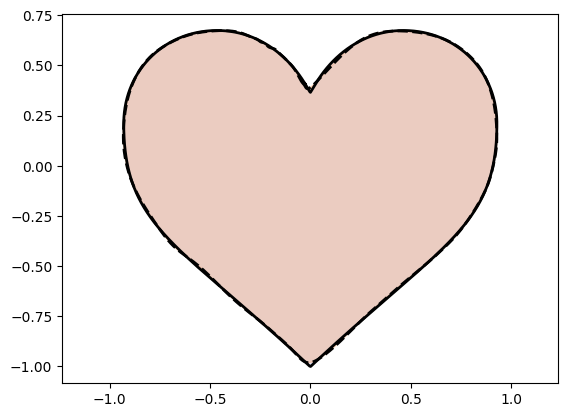

In [8]:
from assets.shapes import heart

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = heart(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Hand

Epoch: [    1/10000]. Loss:    0.355091
Epoch: [ 2000/10000]. Loss:    0.017622
Epoch: [ 4000/10000]. Loss:    0.001365
Epoch: [ 6000/10000]. Loss:    0.000641
Epoch: [ 8000/10000]. Loss:    0.000490
Epoch: [10000/10000]. Loss:    0.000426


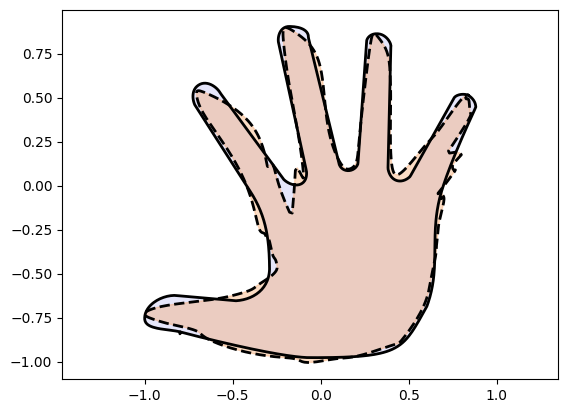

In [11]:
from assets.shapes import hand

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = hand(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Puzzle Piece

Epoch: [    1/10000]. Loss:    0.566860
Epoch: [ 2000/10000]. Loss:    0.001114
Epoch: [ 4000/10000]. Loss:    0.000430
Epoch: [ 6000/10000]. Loss:    0.000361
Epoch: [ 8000/10000]. Loss:    0.000332
Epoch: [10000/10000]. Loss:    0.000298


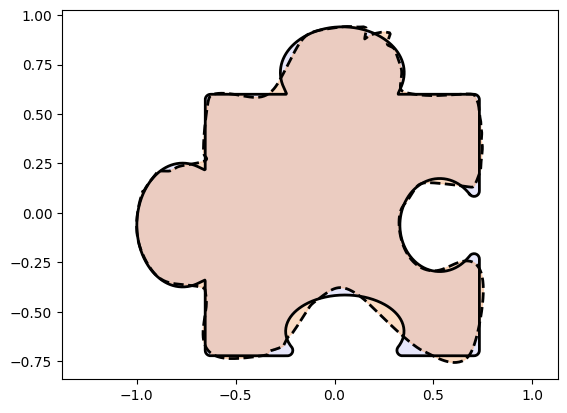

In [12]:
from assets.shapes import puzzle_piece

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = puzzle_piece(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

## Airplane

Epoch: [    1/10000]. Loss:    1.727566
Epoch: [ 2000/10000]. Loss:    0.002195
Epoch: [ 4000/10000]. Loss:    0.001274
Epoch: [ 6000/10000]. Loss:    0.001011
Epoch: [ 8000/10000]. Loss:    0.000968
Epoch: [10000/10000]. Loss:    0.000946


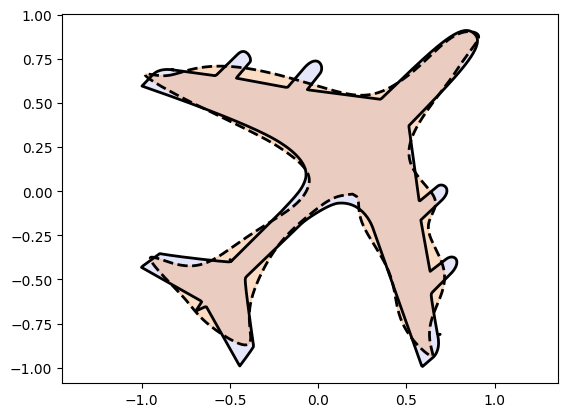

In [2]:
from assets.shapes import airplane

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt = airplane(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 10, nodes_per_group = 10)
nig_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net)

automate_training(
    model = nig_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc = nig_net(t)
plot_curves(Xc, Xt)

# Intersection Impossible
We now fit Injective Networks to target curves when we first perform a matrix exponential of the
weight matrices and then use them for the linear transformations. Therefore, non-invertibility of
weight matrices is impossible during optimization.

## Circle and Square

Training Circle Net:
Epoch: [   1/1000]. Loss:    1.228657
Epoch: [ 200/1000]. Loss:    0.000054
Epoch: [ 400/1000]. Loss:    0.000022
Epoch: [ 600/1000]. Loss:    0.000012
Epoch: [ 800/1000]. Loss:    0.000008
Epoch: [1000/1000]. Loss:    0.000006
Training Square Net:
Epoch: [   1/1000]. Loss:    0.644530
Epoch: [ 200/1000]. Loss:    0.004742
Epoch: [ 400/1000]. Loss:    0.004563
Epoch: [ 600/1000]. Loss:    0.004495
Epoch: [ 800/1000]. Loss:    0.004458
Epoch: [1000/1000]. Loss:    0.004434


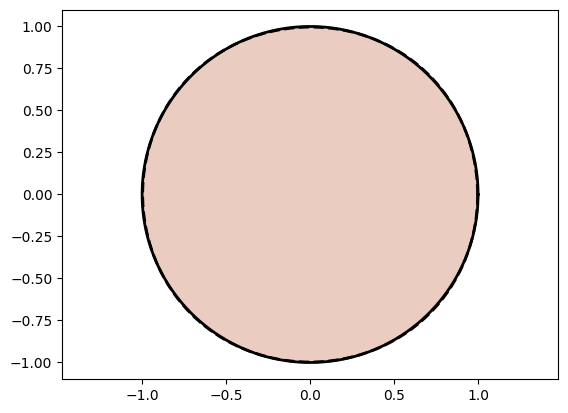

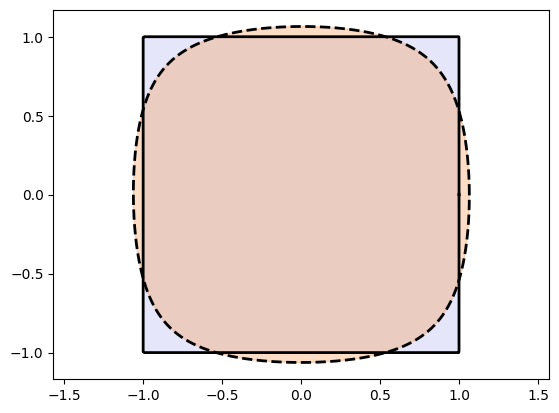

In [10]:
from assets.shapes import circle, square

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_circle = circle(num_pts)
Xt_square = square(num_pts)

# Initialize networks to learn the target shapes and train
monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 3, nodes_per_group = 3)
circle_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net, intersection = 'impossible')
square_net = NIGnet(layer_count = 3, monotonic_net = monotonic_net, intersection = 'impossible')

print('Training Circle Net:')
automate_training(
    model = circle_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_circle,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)
print('Training Square Net:')
automate_training(
    model = square_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_square,
    learning_rate = 0.1, epochs = 1000, print_cost_every = 200
)

# Get final curve represented by the networks
Xc_circle = circle_net(t)
Xc_square = square_net(t)

# Plot the curves
plot_curves(Xc_circle, Xt_circle)
plot_curves(Xc_square, Xt_square)

## Stanford Bunny

Epoch: [    1/10000]. Loss:    3.349069
Epoch: [ 2000/10000]. Loss:    0.042657
Epoch: [ 4000/10000]. Loss:    0.004270
Epoch: [ 6000/10000]. Loss:    0.003393
Epoch: [ 8000/10000]. Loss:    0.003189
Epoch: [10000/10000]. Loss:    0.003115


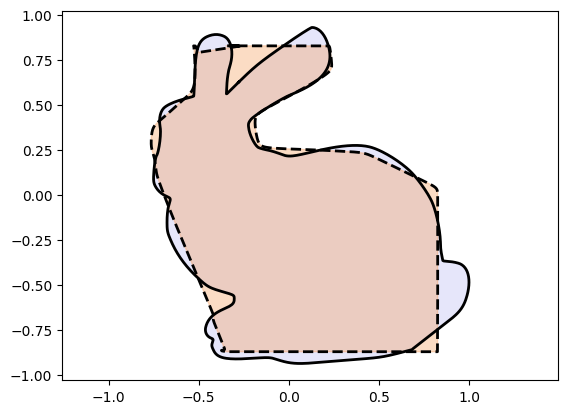

In [38]:
from assets.shapes import stanford_bunny

# Generate target curve points
num_pts = 1000
t = torch.linspace(0, 1, num_pts).reshape(-1, 1)
Xt_bunny = stanford_bunny(num_pts)

monotonic_net = SmoothMinMaxNet(input_dim = 1, n_groups = 6, nodes_per_group = 6)
bunny_net = NIGnet(layer_count = 5, monotonic_net = monotonic_net, intersection = 'impossible')

automate_training(
    model = bunny_net, loss_fn = gs.MSELoss(), X_train = t, Y_train = Xt_bunny,
    learning_rate = 0.1, epochs = 10000, print_cost_every = 2000
)

Xc_bunny = bunny_net(t)
plot_curves(Xc_bunny, Xt_bunny)